# Numerical Solution of the Schrödinger's Equation in Python

## Sara Kojic

Waves are described by their wavelength $\lambda$ and their frequency ν or their wavenumber $k=2\pi/\lambda$, their angular frequency $\omega=2\piν$. [1]

Plank-Einstein relations of light:
\begin{equation}
E=\hbar\omega,  p=k\hbar
\end{equation}

\begin{equation}
\frac{p^2}{2m} + V(x,t) = E
\end{equation}


\begin{equation}
\psi = A cos (kx-\omega*t + \phi)
\end{equation}

\begin{equation}
\psi = C e^{i(kx-\omega*t)}
\end{equation}

C= a complex number that contains both the amplitude and the phase

Then we can substitute the momentum $p$ and energy $E$ with their values in the Planck-Einstein relations:

\begin{equation}
\frac{\hbar^2}{2m}k^2+V(x,t)=\hbar\omega
\end{equation}

Then we can multiply the energy equation by a wavefunction:

\begin{equation}
\frac{\hbar^2}{2m}k^2\psi(x,t)+V(x,t)\psi(x,t)=\hbar\omega\psi(x,t)
\end{equation}

$k$ and $\omega$ can then be replaced by the differential operators acting on the wavefunction $\psi(x,t)$. To replace $k^2$ and $\omega$ by derivatives a complex form of the wavefunction needs to be used

\begin{equation}
k^2 -> - \frac{\partial^2}{\partial^2x}
\end{equation}

\begin{equation}
\omega ->i\frac{\partial}{\partial t}
\end{equation}

\begin{equation}
-\frac{\hbar^2}{2m}\frac{\partial^2\psi(x,t)}{\partial^2x}+V(x,t)\psi(x,t)=i\hbar\frac{\partial\psi(x,t)}{\partial t}
\end{equation}

This is a one-dimensional Schrödinger equation that can be generalized to the tree dimensions:

\begin{equation}
-\frac{\hbar^2}{2m}\nabla^2+V(x,t)\psi(x,t)=i\hbar\frac{\partial\psi(x,t)}{\partial t}
\end{equation}

\begin{equation}
\nabla^2=\frac{\partial^2}{\partial^2x}+\frac{\partial^2}{\partial^2y}+\frac{\partial^2}{\partial^2z}
\end{equation}

The probability density function of the particle's location is 
\begin{equation}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}|\psi(x,y,z;t)|^ 2dx dy dz=1
\end{equation}

## Particle in a box

\begin{equation}
V(x)=0, 0<x<L           
\end{equation}
\begin{equation}
V(x)=\infty, x\leq0  \lor x\geq L
\end{equation}

\begin{equation}
-\frac{\hbar}{2m}\frac{d^2\psi}{dx^2}=E\psi
\end{equation}

\begin{equation}
\frac{d^2\psi}{dx^2}+(\frac{2mE}{\hbar})\psi=0
\end{equation}

This is an ordered differential equations eigen value problem. The solution for it is:

\begin{equation}
\psi(x)=A\cos\frac{\sqrt{2mEx}}{\hbar}+B\sin\frac{\sqrt{2mEx}}{\hbar}
\end{equation}

\begin{equation}
E_n=\frac{n^2\pi^2\hbar}{2mL^2}
\end{equation}


\begin{equation}
n=1,2,3...
\end{equation}

The wavefunction is given by the $B\sin\frac{\sqrt{2mEx}}{\hbar}$ that can be normalized as 

\begin{equation}
\int_{0}^{L}|\psi_n(x)|^2dx=1
\end{equation}

\begin{equation}
B=\sqrt{2/L}
\end{equation}

\begin{equation}
\psi_n(x)=\sqrt{\frac{2}{L}}sin\frac{xn\pi} {L}, 0<x<L        
\end{equation}


The above derivation of the equation was written based on the derivation from this [1] web page.

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from scipy.linalg import eigh_tridiagonal
!pip install findiff
from findiff import FinDiff
import seaborn

In [146]:
def psi(x,n,L):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)
def psi_2(x,n,L):
    return np.square(psi(x,n,L))

In [147]:

h=6.626*10**(-34)
me=9.109*10**(-31)
hbar=h/(2*np.pi)
x=np.linspace(0,1,100)
L=1


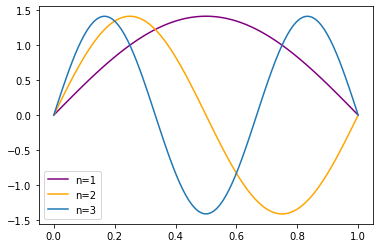

In [148]:
plt.plot(x,psi(x,1,1),label="n=1",color="purple")
plt.plot(x,psi(x,2,1),label="n=2",color="orange")
plt.plot(x,psi(x,3,1),label="n=3")
plt.legend()

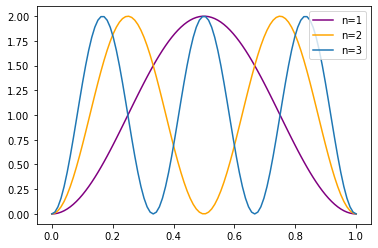

In [149]:
plt.plot(x,psi_2(x,1,1),label="n=1",color="purple")
plt.plot(x,psi_2(x,2,1),label="n=2",color="orange")
plt.plot(x,psi_2(x,3,1),label="n=3")
plt.legend()

The above code was written based on [3] this code

## Particle in a 2-dimensional box

\begin{equation}
\psi(x,y)=\frac{2}{\sqrt{LxLy}}\sin(\frac{x\pi nx}{Lx})\sin(\frac{y\pi ny}{Ly})
\end{equation}
The above equation was gotten from this [2] website.

In [119]:
def psi_x_y(x,y,nx,ny,Lx,Ly):
    return (2/np.sqrt(Lx*Ly))*np.sin(nx*np.pi*x/L)*np.sin(ny*np.pi*y/L)
def psi_x_y_2(x,y,nx,ny,Lx,Ly):
    return np.square(psi_x_y(x,y,nx,ny,Lx,Ly))

Text(0.5, 0.92, 'nx=2 ny=3')

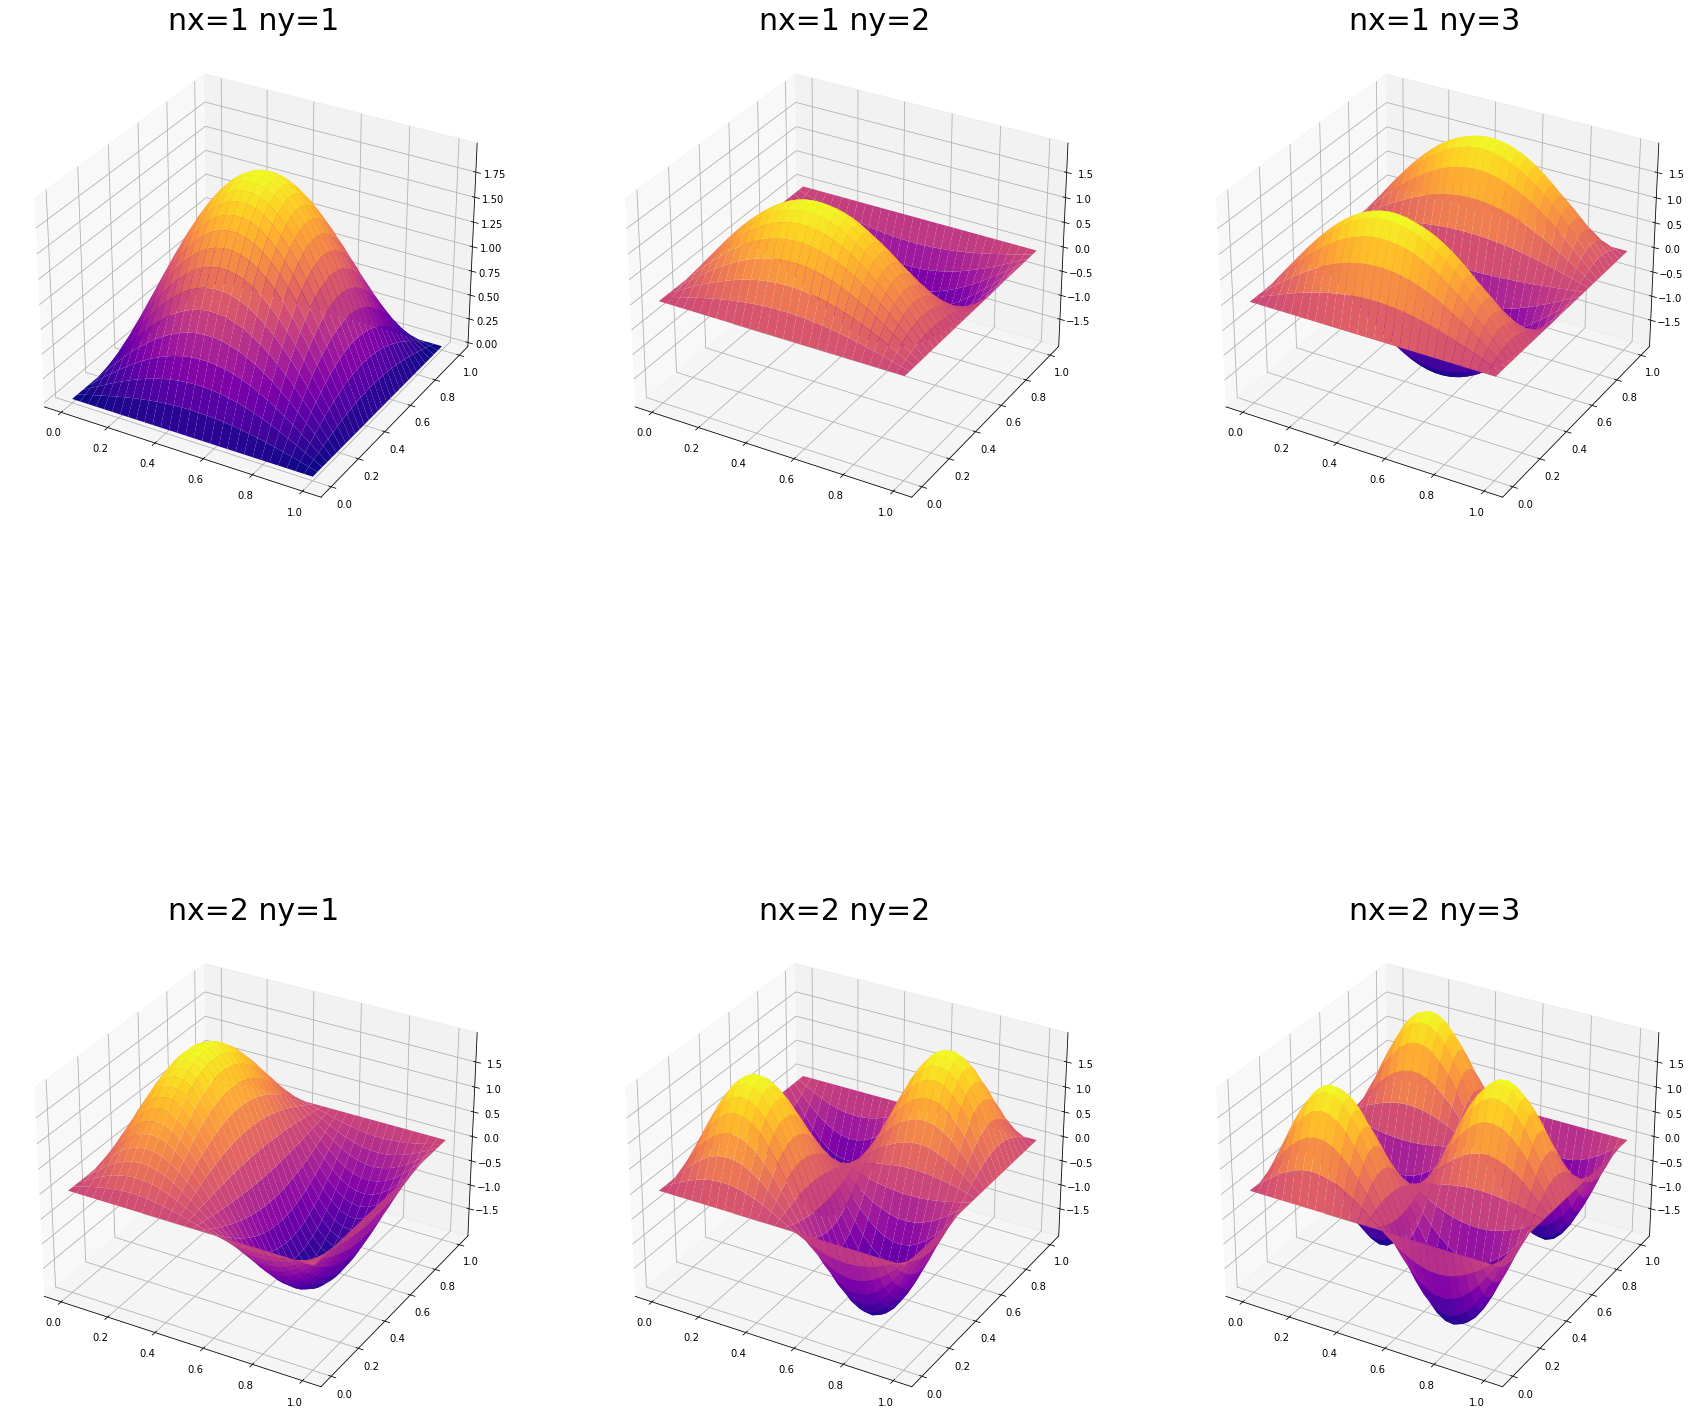

In [131]:
import matplotlib
y=x
z=x
X,Y=np.meshgrid(x,y)

fig, ax = plt.subplots(2, 3,subplot_kw={"projection": "3d"},figsize=(30,30))

ax[0][0].plot_surface(X, Y,psi_x_y(X,Y,1,1,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[0][0].set_title("nx=1 ny=1",fontsize=30)
ax[0][1].plot_surface(X, Y,psi_x_y(X,Y,1,2,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[0][1].set_title("nx=1 ny=2",fontsize=30)
ax[0][2].plot_surface(X, Y,psi_x_y(X,Y,1,3,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[0][2].set_title("nx=1 ny=3",fontsize=30)
ax[1][0].plot_surface(X, Y,psi_x_y(X,Y,2,1,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[1][0].set_title("nx=2 ny=1",fontsize=30)
ax[1][1].plot_surface(X, Y,psi_x_y(X,Y,2,2,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[1][1].set_title("nx=2 ny=2",fontsize=30)
ax[1][2].plot_surface(X, Y,psi_x_y(X,Y,2,3,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[1][2].set_title("nx=2 ny=3",fontsize=30)


Text(0.5, 0.92, 'nx=2 ny=3')

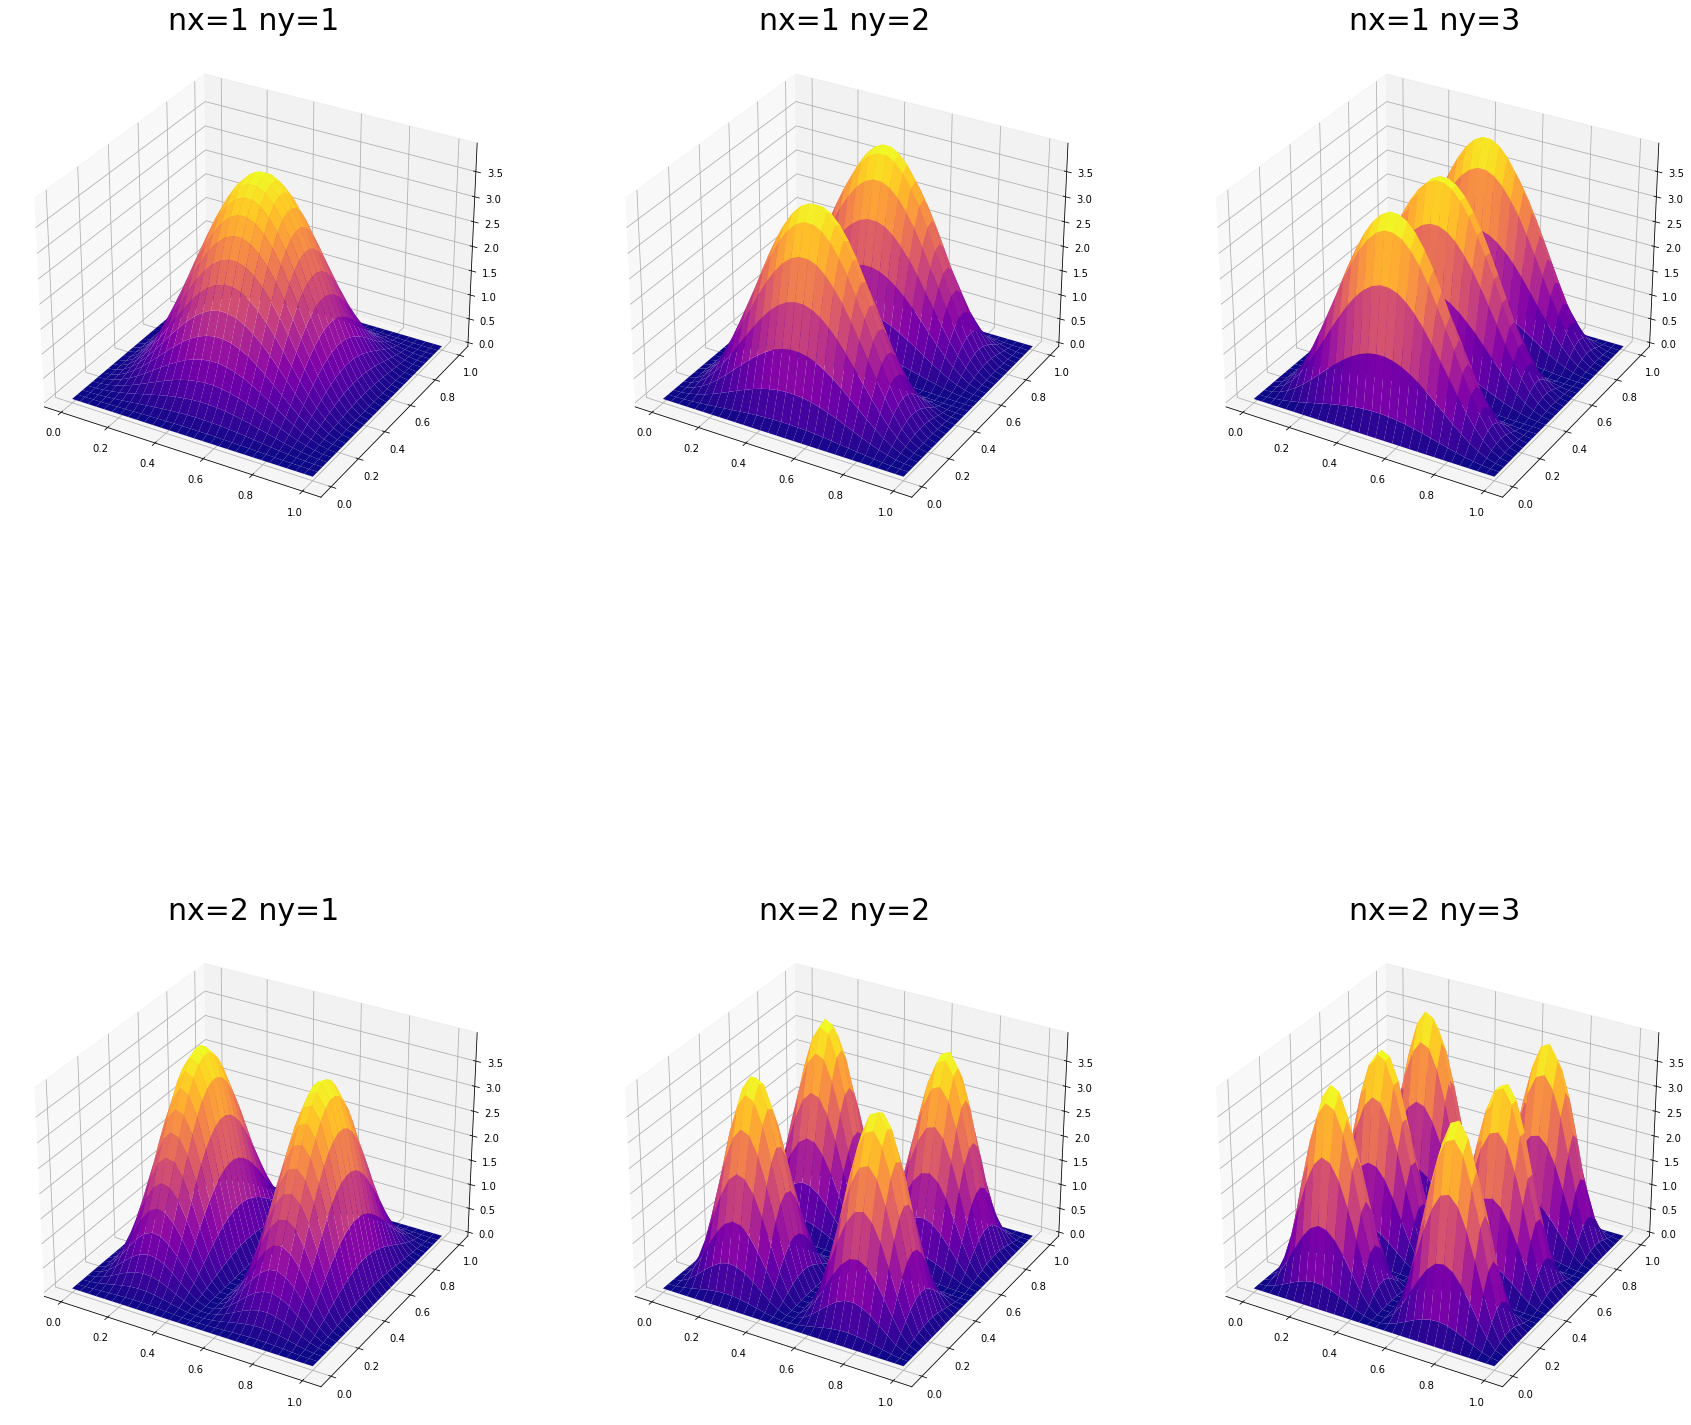

In [132]:
fig, ax = plt.subplots(2, 3,subplot_kw={"projection": "3d"},figsize=(30,30))

ax[0][0].plot_surface(X, Y,psi_x_y_2(X,Y,1,1,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[0][0].set_title("nx=1 ny=1",fontsize=30)
ax[0][1].plot_surface(X, Y,psi_x_y_2(X,Y,1,2,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[0][1].set_title("nx=1 ny=2",fontsize=30)
ax[0][2].plot_surface(X, Y,psi_x_y_2(X,Y,1,3,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[0][2].set_title("nx=1 ny=3",fontsize=30)
ax[1][0].plot_surface(X, Y,psi_x_y_2(X,Y,2,1,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[1][0].set_title("nx=2 ny=1",fontsize=30)
ax[1][1].plot_surface(X, Y,psi_x_y_2(X,Y,2,2,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[1][1].set_title("nx=2 ny=2",fontsize=30)
ax[1][2].plot_surface(X, Y,psi_x_y_2(X,Y,2,3,1,1), 
                       cmap=matplotlib.cm.plasma)
ax[1][2].set_title("nx=2 ny=3",fontsize=30)



## Hydrogen 1s density

In [178]:
class Coordinate:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

def prob_1s(x,y,z):
    r=np.sqrt(np.square(x)+np.square(y)+np.square(z))
    return np.square(np.exp(-r)/np.sqrt(np.pi))
x=np.linspace(0,1,30)
y=np.linspace(0,1,30)
z=np.linspace(0,1,30)


probability=[]
elements=[]
for xi in x:
    for yi in y:
        for zi in z:
            elements.append(Coordinate(xi,yi,zi))
            probability.append(prob_1s(xi,yi,zi))
 

In [177]:

probability = probability/sum(probability)                
probability=probability/sum(probability)
coord = np.random.choice(elements, size=100000, replace=True, p=probability)

In [152]:
x_coords = [i.x for i in coord]
y_coords = [i.y for i in coord]
z_coords = [i.z for i in coord]

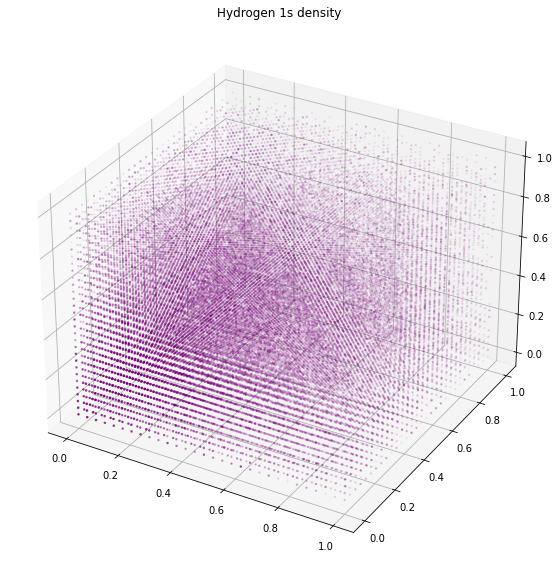

In [154]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, alpha=0.05, s=2,color="purple")
ax.set_title("Hydrogen 1s density")
plt.show()

The above code was written based on this [4] code.

## Time independent Schrödinger equation

In [210]:
h=6.626*10**(-34)
me=9.109*10**(-31)
hbar=h/(2*np.pi)

dx=0.002
x=np.arange(0,1,dx)
L=1


In [211]:
x = np.linspace(-8, 8, 201) 
energies, states = eigs(
            -0.5 * FinDiff(0, x[1]-x[0], 2).matrix(x.shape) +                                        
                        diags(0.5*x**2),
                        k=10, which='SR')
i_energies, i_states = eigs(
            -0.5 * FinDiff(0, x[1]-x[0], 2).matrix(x.shape) +                                        
                        diags(0.5*x**2),
                        k=10, which='SR')

(-6.0, 6.0)

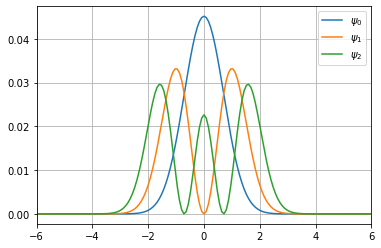

In [212]:
import matplotlib.pyplot as plt
plt.plot(x, np.square(states[:, 0].real), label='$\psi_0$')
plt.plot(x, np.square(states[:, 1].real), label='$\psi_1$')
plt.plot(x, np.square(states[:, 2].real), label='$\psi_2$')


plt.grid()
plt.legend()
plt.xlim(-6, 6)

<BarContainer object of 10 artists>

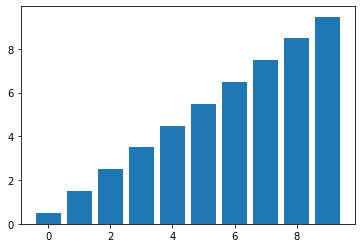

In [159]:
plt.bar(np.arange(0,10,1),energies.real[:10])


The above code was written based on this [5] code.

[1]Jeffry R. Chasnov(18th November 2021) "The Schrödinger Equation"
https://math.libretexts.org/Bookshelves/Differential_Equations/Differential_Equations_(Chasnov)/09%3A_Partial_Differential_Equations/9.08%3A_The_Schrodinger_Equation(6th December 2022)

[2]Mark Tuckerman and Michael Fowler (29th November 2021) "Particle in a 2-Dimensional Box" https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Quantum_Mechanics/05.5%3A_Particle_in_Boxes/Particle_in_a_2-Dimensional_Box (6th December 2022)

[3][4] Quantum Physics Visualization with Python: Particle in a box, Visualising the Orbitals (Apr 12, 2018)
https://towardsdatascience.com/quantum-physics-visualization-with-python-35df8b365ff (3rd December 2022)

[5]Two Lines of Python to Solve the Schrödinger Equation (Dec 23, 2021)
https://medium.com/@mathcube7/two-lines-of-python-to-solve-the-schrödinger-equation-2bced55c2a0e
(4th December 2022)